# <p style="color:darkblue">Introdução ao Aprendizado Profundo</p>

<hr>




* Neste Jupyter-Notebook farei uma introdução ao Aprendizado Profundo (Deep Learning), que é um subset do que abordaremos previamente (Machine Learning). Nossa introdução será feita com o framework de Deep Learning chamado Pytorch (Facebook) que é atualmente um dos mais usados junto com o Tensorflow (Google). Os dois são de extrema importância atualmente e são os mais usados majoritariamente nas grandes conferências, com o Pytorch tendo uma crescente nos últimos anos. Escolhemos Pytorch para o intuito dessa atividade, pois **eu** estou estudando pytorch, mas o tensorflow também executaria com quase a mesma eficiência e complexidade.

<a href="https://colab.research.google.com/github/ItamarRocha/AI-Introduction/blob/main/Deep%20Learning/Deep%20Learning%20com%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - O que é Pytorch?

<p align="center">
   <img src="https://raw.githubusercontent.com/ItamarRocha/AI-Introduction/main/Deep%20Learning/images/pytorch.png?token=AMZBEI6HULOKAGFLWXQ5HCLA7K3NK" width="500px">
</p>

Pytorch é uma biblioteca otimizada de cálculo com tensores para Deep Learning. Ou seja, é usada sobretudo para o treinamento de redes neurais.

## 2 - Setting up

In [ ]:
!pip install matplotlib
!pip install torch
!pip install sklearn
!pip install numpy

In [1]:
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from sklearn.metrics import confusion_matrix
from torch.utils.data import TensorDataset

In [2]:
import numpy as np
import random

def generate_losangles(data_size, quadrant):
    points = []
    for _ in range(data_size):
        if quadrant == 0:
            x = random.uniform(0,1)
            y = random.uniform(0,1-x)
            points.append([x,y,quadrant])

        if quadrant == 1:
            x = random.uniform(-1,0)
            y = random.uniform(0,x+1)
            points.append([x,y,quadrant])

        if quadrant == 2:
            x = random.uniform(0,1)
            y = random.uniform(-1+x, 0)
            points.append([x,y,quadrant])

        if quadrant == 3:
            x = random.uniform(-1,0)
            y = random.uniform(-1-x, 0)
            points.append([x,y,quadrant])

    return points

def generate_edges(data_size, quadrant):
    points = []

    for _ in range(data_size):

        if quadrant == 0:
            x = random.uniform(0,1)
            y = random.uniform(1-x, np.sqrt(1 - x**2))
            points.append([x,y,quadrant+4])

        if quadrant == 1:
            x = random.uniform(-1,0)
            y = random.uniform(1+x, np.sqrt(1 - x**2))
            points.append([x,y,quadrant+4])    

        if quadrant == 2:
            x = random.uniform(-1,0)
            y = random.uniform(-np.sqrt(1 - x**2), -1 - x)
            points.append([x,y,quadrant+4])        

        if quadrant == 3:
            x = random.uniform(0,1)
            y = random.uniform(-np.sqrt(1 - x**2), -1 + x)
            points.append([x,y,quadrant+4])    

    return points

def get_data(size=500, train_test_split=0.2):
    quadrants = [0,1,2,3]
    data_train = []
    data_test = []
    amount_test = int(size * train_test_split)
    amount_train = size - amount_test

    for quadrant in quadrants:
        data_train.extend(generate_losangles(amount_train,quadrant))
        data_test.extend(generate_losangles(amount_test,quadrant))
        data_train.extend(generate_edges(amount_train,quadrant))
        data_test.extend(generate_edges(amount_test,quadrant))

    data_train = np.array(data_train, dtype=np.float32)
    data_test = np.array(data_test, dtype=np.float32)

    X_train = data_train[:,[0,1]]
    y_train = data_train[:,2]
    X_test = data_test[:,[0,1]]
    y_test = data_test[:,2]

    return X_train, X_test, y_train, y_test

## 3 - Tensores

### 3.1 - O que é um tensor?

Os cálculos feitos pelas redes neurais são um monte de operações de álgebra linear com **tensores**. Um vetor é um tensor de uma dimensão, uma matrix um de duas dimensãos e uma imagem RGB pode ser um tensor de três dimensões. Basicamente todos os frameworks de Deep Learning são construídos com base em tensores, assim como o Pytorch. 

<img src="https://raw.githubusercontent.com/ItamarRocha/AI-Introduction/main/Deep%20Learning/images/tensor_examples.svg?token=AMZBEI2Q5XZ2P6U4TCNCLL3A7K3K4" width=600px>

Abaixo vamos entender um pouco como manipular eles e alguns conceitos.

### 3.2 - Criando Tensores

Vamos começar criando um tensor armazenando um único número.

In [3]:
# Número
t1 = torch.tensor(2.)
t1

tensor(2.)

O 2. significa que estamos trabalhando com um float. Podemos checar o tipo dos nossos tensores através do dtype.

In [4]:
t1.dtype

torch.float32

Vamos criar tensores mais complexos.

In [5]:
# Vetor
t2 = torch.tensor([1,1,1,1])
t2

tensor([1, 1, 1, 1])

In [6]:
# Matriz
t3 = torch.tensor([[1,2],
                   [3,4],
                   [5,6]])
t3

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [7]:
# Array tri dimensional
t4 = torch.tensor([
    [[1,2,3],
     [4,5,6]],
    [[7,8,9],
     [10,11,12]]
])
t4

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

Os tensores podem ter várias dimensões e diferentes tamanhos em cada dimensão. Para vermos a dimensão podemos usar o .shape.

In [8]:
print(t2)
t2.shape

tensor([1, 1, 1, 1])


torch.Size([4])

In [9]:
print(t4)
t4.shape

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


torch.Size([2, 2, 3])

Vamos agora ver como podemos criar tensores a partir do numpy e qual a relação com os tensores.

In [10]:
a = np.random.rand(4,3)
a

array([[0.58147832, 0.19470268, 0.32542478],
       [0.54755603, 0.92046953, 0.04816015],
       [0.46647179, 0.09125972, 0.82759749],
       [0.50347628, 0.21678376, 0.83020607]])

In [11]:
b = torch.from_numpy(a)
b

tensor([[0.5815, 0.1947, 0.3254],
        [0.5476, 0.9205, 0.0482],
        [0.4665, 0.0913, 0.8276],
        [0.5035, 0.2168, 0.8302]], dtype=torch.float64)

In [12]:
b.numpy()

array([[0.58147832, 0.19470268, 0.32542478],
       [0.54755603, 0.92046953, 0.04816015],
       [0.46647179, 0.09125972, 0.82759749],
       [0.50347628, 0.21678376, 0.83020607]])

In [13]:
a[0][0] = 2

In [14]:
a

array([[2.        , 0.19470268, 0.32542478],
       [0.54755603, 0.92046953, 0.04816015],
       [0.46647179, 0.09125972, 0.82759749],
       [0.50347628, 0.21678376, 0.83020607]])

In [15]:
b

tensor([[2.0000, 0.1947, 0.3254],
        [0.5476, 0.9205, 0.0482],
        [0.4665, 0.0913, 0.8276],
        [0.5035, 0.2168, 0.8302]], dtype=torch.float64)

A memória é compartilhada entre o array numpy e o Torch tensor.

### 3.3 - Operações com tensores

In [16]:
x = torch.tensor(6, dtype=torch.float32)
w = torch.tensor(5., requires_grad=True)
b = torch.tensor(10., requires_grad=True)
x, w, b

(tensor(6.), tensor(5., requires_grad=True), tensor(10., requires_grad=True))

Criamos três tensores x, w e b e vamos agora realizar algumas operações.

In [17]:
y = w * x + b
y

tensor(40., grad_fn=<AddBackward0>)

O grande uso do Pytorch para Deep Learning é que é uma biblioteca otimizada para cálculos com tensores e pode computar o gradiente das operações de forma simples, com apenas uma função. Essa funcionalidade é chamada de **autograd** (automatic gradient)

In [18]:
y.backward()

In [19]:
x.grad, w.grad, b.grad

(None, tensor(6.), tensor(1.))

x não tem gradiente, pois não especificamos o **requires_grad=True**.

https://pytorch.org/docs/stable/torch.html

## 4 - Deep Learning

> When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN). The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. Even so, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

Essa citação foi tirada do livro Hands-On Machine Learning, de Aurélien Géron e serve para mostrar que ainda existem certos conflitos com relação ao que é ou não Deep Learning. Dessa maneira, vamos começar abordando as redes mais simples e em seguida vamos rodar um modelo um pouco mais completo.

O Deep Learning é baseado em redes neurais artificais (ANN), que existem desde a década de 1950. Uma das primeiras e mais simples redes neurais, **O Perceptron**, surgiu com Frank Rosenblatt em 1957.

![perceptron](https://raw.githubusercontent.com/ItamarRocha/AI-Introduction/main/Deep%20Learning/images/perceptron.png?token=AMZBEI7LR6FER6HRAQIGBYDA7K3JK)

Similar ao que fizemos com o pytorch, faltando apenas a função de ativação.

Entretando, as redes neurais atuais são um pouco mais complexas: tem diversas unidades e camadas (daí o nome aprendizado profundo). As redes são construídas por vários células/nós/unidades que chamamos de neurônios. Cada uma dessas unidades tem um número de pesos que é usado para fazer uma combinação linear e em seguida passar o resultado para uma função de ativação que produzirá a entrada da próxima camada ou um possível output.

Matematicamente, podemos expressar um percepron da seguinte forma: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

Com vetores o produto interno seria da seguinte forma:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

As fórmulas matemáticas mostradas acima seriam equivalente à propagação da informação de um neurônio. Para redes maiores, teríamos meio que a mesma fórmula, mas ampliada para as diversas camadas.

Basicamente, recapitulando, quando uma rede neural é treinada, iniciamos um conjunto de pesos e os atualizamos com o treinamento e feedback recebido. Nosso objetivo é encontrar um conjunto de pesos que minimize nosso erro.

## 5 - Problema abordado

Vamos tentar resolver um problema simples de identificação de quadrante e montar uma pequena rede neural para executar a tarefa.

In [20]:
X_train, X_test, y_train, y_test = get_data(2000)

In [21]:
len(X_train), len(X_test)

(12800, 3200)

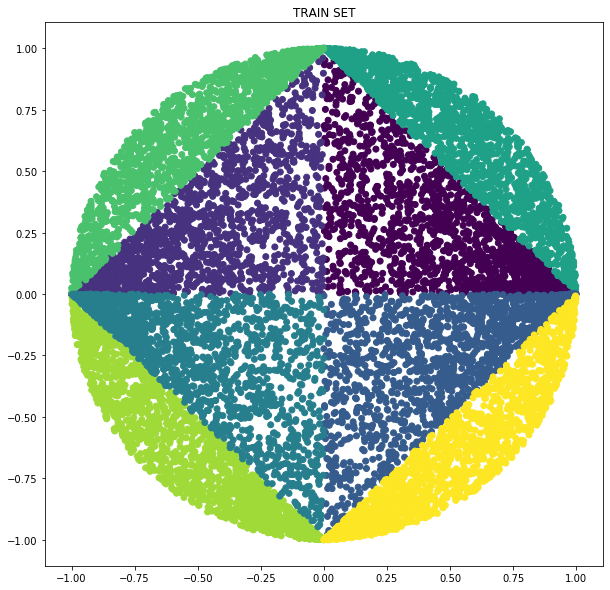

In [22]:
plt.figure(figsize=(10,10))
plt.title('TRAIN SET')
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

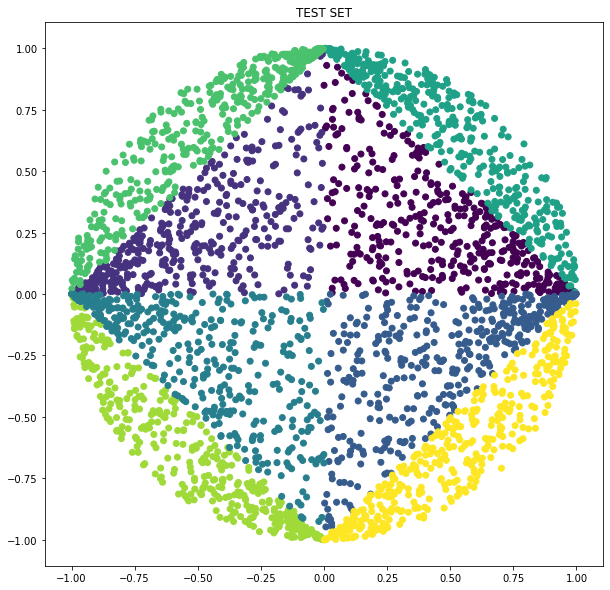

In [23]:
plt.figure(figsize=(10,10))
plt.title('TEST SET')
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.show()

## 6 - Building our network

Vamos agora começar a construir todo o código para treinar nossa rede.

### 6.1 - First steps

In [24]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu") #gpu

In [25]:
print(device)

cuda:0


### 6.2 - Preprocessing the data

In [26]:
# tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)
# transforming in a tensordataset
train = TensorDataset(inputs, targets)

In [27]:
train[0:3]

(tensor([[0.9649, 0.0321],
         [0.8123, 0.0028],
         [0.5117, 0.1119]]),
 tensor([0., 0., 0.]))

In [28]:
# batching to an iterator
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

In [29]:
next(iter(trainloader))

[tensor([[-0.2569,  0.6422],
         [-0.4064,  0.3010],
         [-0.4185, -0.5749],
         [-0.8063,  0.1170],
         [ 0.7820,  0.3908],
         [-0.4365,  0.5760],
         [-0.7081, -0.1799],
         [-0.8381,  0.3810],
         [ 0.3517,  0.2838],
         [ 0.6616,  0.6638],
         [ 0.6849, -0.2810],
         [ 0.4292,  0.5262],
         [-0.0594, -0.2885],
         [ 0.3213,  0.8551],
         [ 0.5084, -0.6207],
         [-0.9506, -0.0963],
         [-0.0503, -0.8643],
         [-0.4578,  0.3591],
         [-0.6801, -0.0270],
         [-0.6264,  0.2089],
         [-0.1453,  0.9005],
         [-0.6628,  0.1985],
         [-0.1765,  0.9248],
         [ 0.5025, -0.1815],
         [-0.2385, -0.2959],
         [ 0.2815, -0.9145],
         [-0.9908, -0.1160],
         [ 0.4420, -0.5260],
         [-0.8940, -0.4013],
         [-0.6891, -0.6852],
         [ 0.2059, -0.9515],
         [ 0.4639, -0.5723],
         [-0.2561, -0.5839],
         [ 0.6401, -0.3047],
         [ 0.9

### 6.3 - Building our Network

Para esse exemplo utilizaremos a seguinte arquitetura para nossa rede:

![](https://raw.githubusercontent.com/ItamarRocha/AI-Introduction/main/Deep%20Learning/images/network_used.png?token=AMZBEI7C7UJVIP2A2YMABUTA7K3HG)

In [30]:
# Representação em código
model = nn.Sequential(nn.Linear(2, 10),
                      nn.ReLU(),
                      nn.Linear(10, 10),
                      nn.ReLU(),
                      nn.Linear(10, 8))

In [31]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=8, bias=True)
)


```python
nn.Linear(2,10)
``
Essa linha criará uma transformação linear $x\mathbf{W} + b$, com 2 inputs (as coordenadas) e 10 outputs que sairam dessa camada para a função `nn.ReLU()` e, em seguida como entrada para a próxima camada. Por esse comportamento que o módulo que usamos se chama `nn.Sequential()`. Podemos ver como a função ReLU se comporta na figura a seguir:

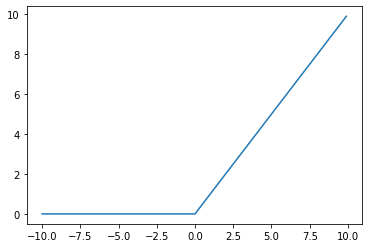

In [32]:
def relu(x):
    return np.maximum(0,x)
 
x=np.arange(-10,10,0.1)
y=relu(x)
plt.plot(x,y)
plt.show()

In [33]:
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=8, bias=True)
)

In [34]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6751, -0.1483],
         [-0.1582,  0.1019],
         [-0.4831,  0.2235],
         [-0.4200,  0.4238],
         [-0.0035,  0.2047],
         [-0.5142, -0.2692],
         [-0.4494, -0.1439],
         [ 0.1888,  0.3738],
         [-0.2247, -0.2233],
         [-0.6227,  0.6810]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6525,  0.3739,  0.2619,  0.0260,  0.0099,  0.4920, -0.5915,  0.0146,
          0.2514, -0.5613], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2165,  0.2584,  0.2831, -0.2207, -0.0272,  0.3140, -0.2006, -0.0005,
           0.2716,  0.0329],
         [-0.1584,  0.0130,  0.1855, -0.1496, -0.1051, -0.2097, -0.1952,  0.2402,
           0.2709,  0.0036],
         [-0.0541,  0.1327, -0.2702,  0.1430,  0.1409, -0.1241,  0.0319, -0.1900,
           0.0305,  0.1601],
         [-0.1266, -0.1198,  0.0619, -0.1503,  0.1148,  0.1321,  0.0913, -0.2087,
          -0.1807,  0.2535],
         [-0.2388,  0.0703, -0.1675,  0.2214,

In [35]:
model[0].weight, model[0].bias

(Parameter containing:
 tensor([[-0.6751, -0.1483],
         [-0.1582,  0.1019],
         [-0.4831,  0.2235],
         [-0.4200,  0.4238],
         [-0.0035,  0.2047],
         [-0.5142, -0.2692],
         [-0.4494, -0.1439],
         [ 0.1888,  0.3738],
         [-0.2247, -0.2233],
         [-0.6227,  0.6810]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6525,  0.3739,  0.2619,  0.0260,  0.0099,  0.4920, -0.5915,  0.0146,
          0.2514, -0.5613], requires_grad=True))

In [36]:
inputs,labels = next(iter(trainloader))

Vamos testar nossa rede sem o treino, para ver como ela se comporta em relação as previsões esperadas.

In [37]:
output = model(inputs)
output

tensor([[ 1.5537e-02,  4.8194e-01,  8.2628e-02,  2.6819e-01,  1.5279e-02,
         -2.0334e-01,  2.2291e-01, -2.9758e-01],
        [ 3.6919e-02,  4.0489e-01,  1.6026e-01,  2.8842e-01,  6.0068e-02,
         -2.6380e-01,  1.9145e-01, -2.0985e-01],
        [-4.0515e-02,  5.3512e-01,  7.8650e-02,  2.0321e-01,  1.9120e-02,
         -1.6976e-01,  2.5561e-01, -3.2303e-01],
        [ 1.2453e-02,  4.9665e-01,  7.0004e-02,  2.6552e-01,  6.8178e-03,
         -1.9580e-01,  2.3887e-01, -3.1947e-01],
        [-4.3607e-02,  4.8897e-01,  1.1499e-01,  1.7936e-01,  3.9687e-02,
         -1.8567e-01,  2.5308e-01, -2.7889e-01],
        [-1.2311e-01,  6.2255e-01,  6.4079e-02,  1.1857e-01,  1.5803e-02,
         -1.1803e-01,  2.9835e-01, -3.7614e-01],
        [-2.9689e-02,  5.0164e-01,  9.4180e-02,  2.0379e-01,  2.7124e-02,
         -1.8198e-01,  2.4751e-01, -2.9649e-01],
        [-2.6123e-02,  4.6504e-01,  1.3393e-01,  2.0004e-01,  5.0739e-02,
         -2.0809e-01,  2.4254e-01, -2.5475e-01],
        [-1.1230

In [38]:
probs = F.softmax(output, dim=1)

In [39]:
max_probs, preds = torch.max(probs, dim=1)

In [40]:
max_probs, preds

(tensor([0.1829, 0.1685, 0.1929, 0.1855, 0.1848, 0.2099, 0.1870, 0.1800, 0.2112,
         0.1733, 0.1749, 0.1662, 0.2098, 0.1645, 0.1696, 0.2002, 0.1680, 0.1650,
         0.1647, 0.1898, 0.1679, 0.1640, 0.1725, 0.1901, 0.2018, 0.1664, 0.2011,
         0.1806, 0.1693, 0.1771, 0.1916, 0.1661, 0.1981, 0.1623, 0.2097, 0.1691,
         0.1888, 0.1866, 0.1959, 0.1935, 0.1666, 0.1870, 0.1617, 0.1739, 0.1773,
         0.1833, 0.1631, 0.1798, 0.1663, 0.1927, 0.1944, 0.1864, 0.1752, 0.1719,
         0.2068, 0.1745, 0.2046, 0.1811, 0.1707, 0.1676, 0.1965, 0.1768, 0.1693,
         0.1655], grad_fn=<MaxBackward0>),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
         3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3]))

In [41]:
torch.sum(preds == labels)

tensor(8)

In [42]:
def accuracy(preds, labels):
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [43]:
accuracy(preds, labels)

tensor(0.1250)

In [44]:
inputs = inputs.detach().numpy() #not using grads

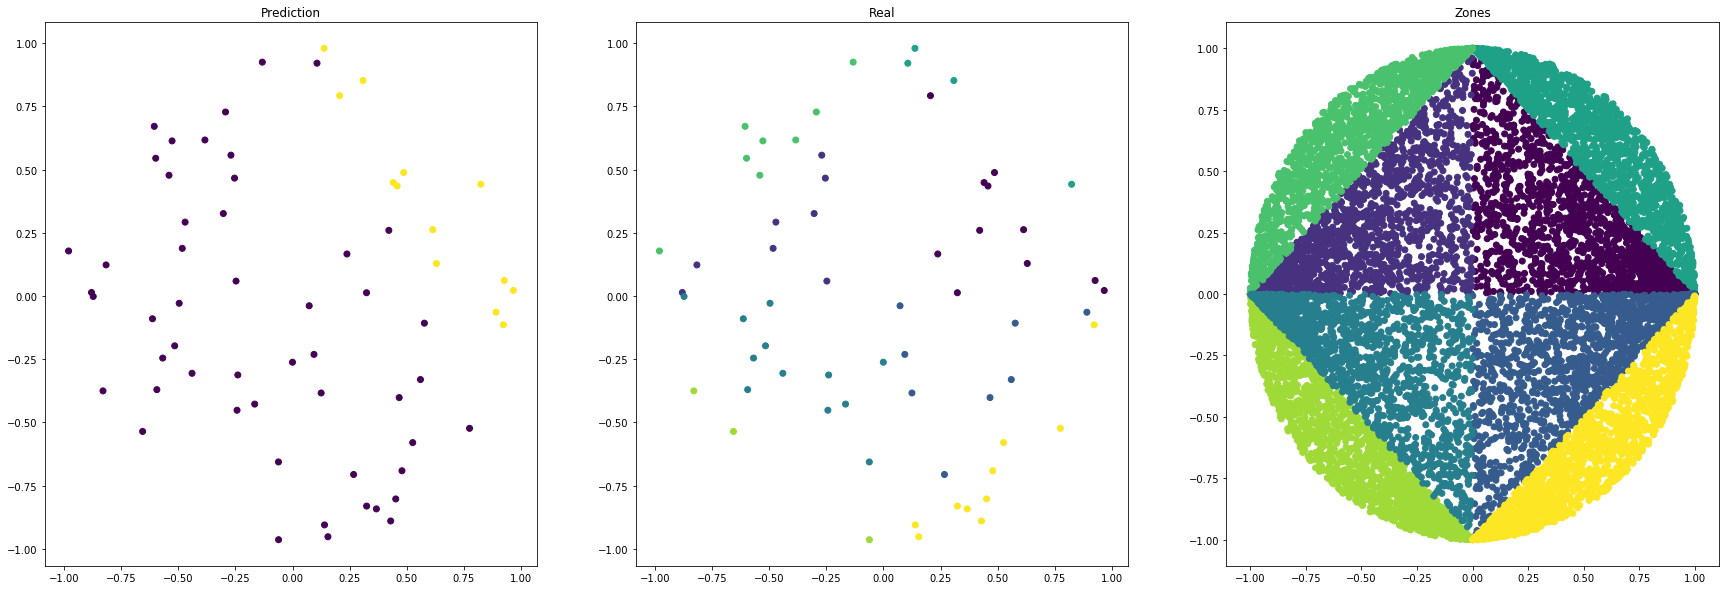

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
axes[0].set_title('Prediction')
axes[0].scatter(inputs[:,0], inputs[:,1], c = preds)
axes[1].set_title('Real')
axes[1].scatter(inputs[:,0], inputs[:,1], c = labels)
axes[2].set_title('Zones')
axes[2].scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

In [46]:
preds.unique(), labels.unique()

(tensor([1, 3]), tensor([0., 1., 2., 3., 4., 5., 6., 7.]))

Bem ruim :(

## 6.4 - Entendendo o aprendizado

Para a rede neural aprender, precisamos corrigir o erro dela de acordo com as previsões feitas. Dessa forma, temos que ter uma função que consiga quantificar nossa estimativa, como vimos na definição de Machine Learning. Com isso, aprendemos agora o conceito de loss, que servirá como uma forma de alimentarmos nosso modelos com informações dos nossos dados e adaptar os pesos e bias de forma a atingirmos um grau de certeza maior.

Então vamos simplesmente usar a acurácia e é isso, certo? Errado.

* Acurácia não é uma função diferenciável (max e ==), então não podemos usar para calcular os gradientes necessários.

* Não é muito bom para correção, pois não nos mostra uma estimativa do erro, apenas se foi certo ou errado para cada exemplo.

Para esse problema, estamos utilizando a CrossEntropyLoss.

In [47]:
criterion = nn.CrossEntropyLoss()

Vamos entender na próxima figura e vídeo um pouco como isso funciona na prática, para que o erro é usado e como melhoramos nossos resultados a partir dele.

[![](https://raw.githubusercontent.com/ItamarRocha/AI-Introduction/main/Deep%20Learning/images/gradient_descent.jpg?token=AMZBEI7BF7USPF6GZZ7X4F3A7K3E4)](https://www.youtube.com/watch?v=rhVIF-nigrY&t=74s)

Agora que já entendemos como funciona a parte do erro e do aprendizado, vamos criar nosso otimizador. Para esta atividade escolhemos o Adam, um método que funciona com a descida do gradiente, mas tem algumas mais otimizações para ajudar tanto na velocidade quanto na precisão do processo de atualização dos pesos.

In [48]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

### 6.5 - Treinando o modelo

Vamos agora treinar nossa rede e fazer o aprendizado pelas número de épocas escolhidas. 1 época corresponde a passar todos os nossos dados pela rede uma vez.

In [49]:
epochs = 1001
for e in range(epochs):
    running_loss = 0
    for coords, labels in trainloader:
        
        optimizer.zero_grad()
        
        output = model(coords)
        loss = criterion(output, labels.long())
        loss.backward()
        
        optimizer.step() # atualiza nossos pesos
        
        running_loss += loss.item()
    if e % 10 == 0:
        print(f"epoch {e} loss: {running_loss/len(trainloader)}")

epoch 0 loss: 0.8762133552134037
epoch 10 loss: 0.09891286876052618
epoch 20 loss: 0.0765867709275335
epoch 30 loss: 0.06734040240291506
epoch 40 loss: 0.0716467421175912
epoch 50 loss: 0.07668337755603716
epoch 60 loss: 0.05774496304336935
epoch 70 loss: 0.05998018621699885
epoch 80 loss: 0.06891413105186076
epoch 90 loss: 0.06082887563388795
epoch 100 loss: 0.06549284946231637
epoch 110 loss: 0.059658872653963045
epoch 120 loss: 0.04922982714662794
epoch 130 loss: 0.06243132007832173
epoch 140 loss: 0.04668485680449521
epoch 150 loss: 0.07604638559248997
epoch 160 loss: 0.048945431143656605
epoch 170 loss: 0.04439636912255082
epoch 180 loss: 0.04897918315487914
epoch 190 loss: 0.05889051977195777
epoch 200 loss: 0.03976683568267617
epoch 210 loss: 0.05643208906520158
epoch 220 loss: 0.04167824045493035
epoch 230 loss: 0.04362820222158916
epoch 240 loss: 0.046875640863363516
epoch 250 loss: 0.05177862324402668
epoch 260 loss: 0.054712579444458245
epoch 270 loss: 0.058892130999010986
e

In [50]:
dataiter = iter(trainloader)

coords, labels = next(dataiter)

# Desligando os gradientes pra ir mais rápido
with torch.no_grad():
    output = model(coords)

probs = F.softmax(output, dim=1)
preds = np.argmax(probs, axis=1)

In [51]:
output

tensor([[-5.4494e+02, -6.1807e+02, -1.1301e+02, -1.6258e+01, -1.4336e+02,
         -9.9866e+01,  3.4712e+01,  1.9060e+01],
        [-1.1602e+01, -1.6690e+02,  8.6175e-01, -1.2953e+01, -3.0608e+02,
         -1.0197e+02, -1.7583e+02, -1.0114e+01],
        [ 4.0121e+00,  1.2388e+01,  3.5009e+00,  5.5546e+00, -1.3515e+01,
         -2.2957e+00, -5.1621e+00, -1.6872e+01],
        [-2.2947e+03,  3.2842e+01, -1.5706e+03, -1.1851e+03, -2.4260e+00,
          1.2879e+02, -7.3702e+02, -1.4645e+03],
        [-8.0525e+01, -3.1545e+02, -1.0103e+01, -1.7141e+01, -4.6992e+02,
         -1.5593e+02, -7.7903e+01,  2.7366e+00],
        [-1.7417e+01, -1.9908e+02,  1.7498e+00, -1.2742e+01, -3.7417e+02,
         -1.2206e+02, -1.5555e+02, -9.8388e+00],
        [-2.4205e+01, -2.3419e+02,  2.1472e+00, -1.2991e+01, -4.4277e+02,
         -1.4168e+02, -1.2224e+02, -7.3960e+00],
        [-4.8687e+00, -1.9266e+01, -1.1255e+01, -2.4209e+02,  2.0825e+01,
          6.5589e+00, -1.6132e+02, -5.3759e+00],
        [-1.2622

In [52]:
accuracy(preds, labels)

tensor(1.)

In [53]:
# Desligando os gradientes pra ir mais rápido
with torch.no_grad():
    output = model(torch.tensor(X_test))
    
probs = F.softmax(output, dim=1)
preds = np.argmax(probs, axis=1)

In [54]:
accuracy(preds, torch.tensor(y_test))

tensor(0.9922)

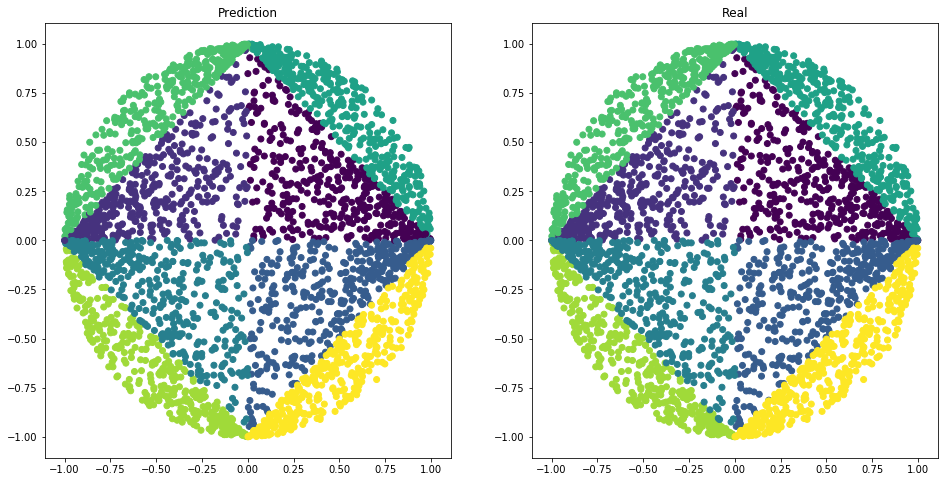

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes[0].set_title('Prediction')
axes[0].scatter(X_test[:,0], X_test[:,1], c = preds)
axes[1].set_title('Real')
axes[1].scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.show()

In [57]:
confusion_matrix(y_test,preds)

array([[398,   0,   2,   0,   0,   0,   0,   0],
       [  0, 398,   0,   0,   0,   2,   0,   0],
       [  1,   0, 397,   0,   0,   0,   0,   2],
       [  0,   1,   0, 394,   0,   0,   5,   0],
       [  2,   0,   0,   0, 398,   0,   0,   0],
       [  0,   2,   0,   0,   0, 398,   0,   0],
       [  0,   0,   0,   7,   0,   0, 392,   1],
       [  0,   0,   0,   0,   0,   0,   0, 400]])

## 7 - References

* https://www.udacity.com/course/deep-learning-pytorch--ud188
* https://www.coursera.org/specializations/deep-learning
* Hands-On Machine Learning With Scikit-Learn, Keras, and Tensorflow, 2nd Edition by Aurélien Géron
* Deep Learning with Python, by François Chollet
* https://sites.google.com/site/gaudenciothaisia/home/aulas?authuser=0
* https://drive.google.com/file/d/1p2bgcAJmqr-DekmZNxlGVHrHEfLAkGAC/view?usp=sharing
* https://github.com/jpvt/Deep_Learning/blob/main/Assignment_1/Exercise_3/Exercise_3.ipynb